In [5]:
!pip install gym stable-baselines3


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 61.1     |
|    ep_rew_mean     | -3.83    |
| time/              |          |
|    fps             | 1440     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 70.5         |
|    ep_rew_mean          | 92           |
| time/                   |              |
|    fps                  | 1001         |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0137630245 |
|    clip_fraction        | 0.105        |
|    clip_range           | 0.2          |
|    en

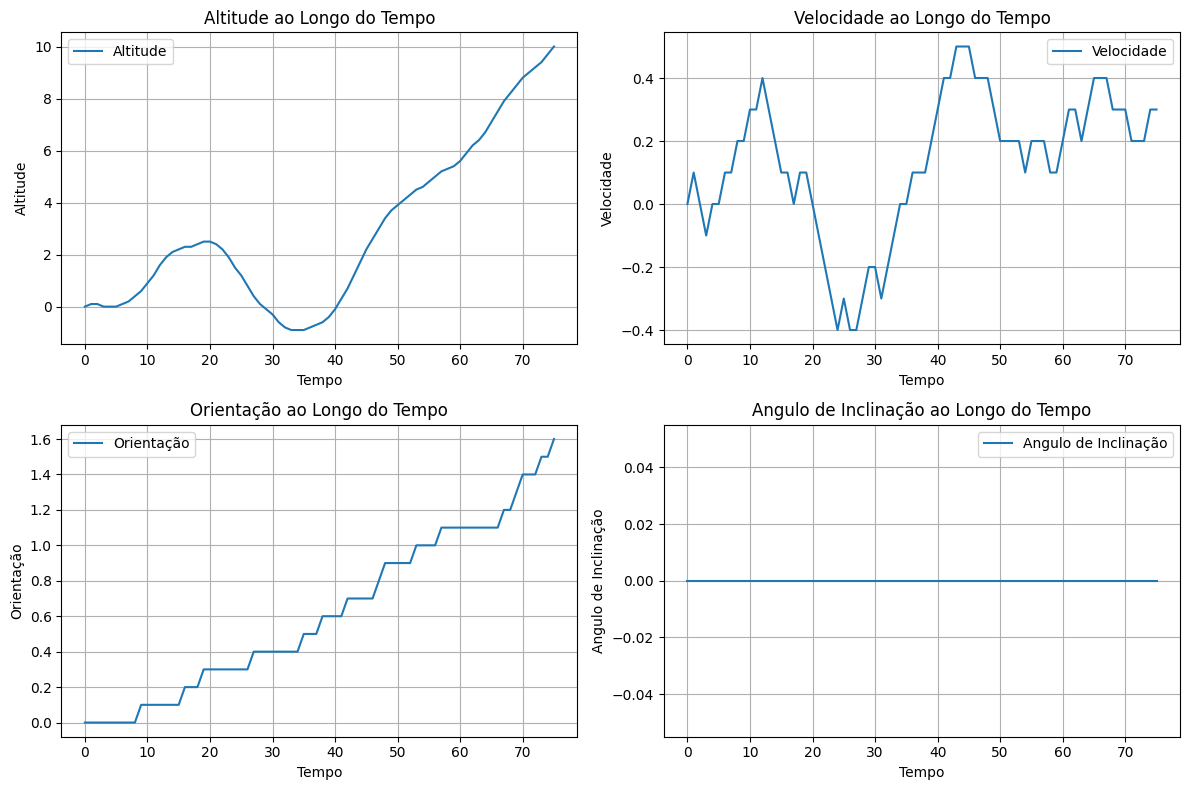

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

# Definir um ambiente de simulação para o veículo aéreo
class AerialVehicleEnv(gym.Env):
    def __init__(self):
        super(AerialVehicleEnv, self).__init__()
        self.action_space = gym.spaces.Discrete(4)  # Ações: acelerar, manter velocidade, desacelerar, girar
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(4,))  # Estado: altitude, velocidade, orientação, angulo de inclinação
        self.altitude = 0
        self.velocity = 0
        self.orientation = 0
        self.inclination_angle = 0

    def step(self, action):
        # Simular o veículo aéreo
        if action == 0:
            self.velocity += 0.1
        elif action == 1:
            pass  # Manter a velocidade constante
        elif action == 2:
            self.velocity -= 0.1
        elif action == 3:
            self.orientation += 0.1

        # Atualizar altitude com base na velocidade
        self.altitude += self.velocity

        # Definir recompensa com base na altitude
        reward = self.altitude

        # Verificar se o episódio terminou
        done = abs(self.altitude) > 10

        return [self.altitude, self.velocity, self.orientation, self.inclination_angle], reward, done, {}

    def reset(self):
        # Resetar o ambiente
        self.altitude = 0
        self.velocity = 0
        self.orientation = 0
        self.inclination_angle = 0
        return [self.altitude, self.velocity, self.orientation, self.inclination_angle]

# Criar e treinar um agente de aprendizado por reforço (PPO)
env = AerialVehicleEnv()
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Testar o agente treinado
obs = env.reset()
altitudes = [obs[0]]
velocities = [obs[1]]
orientations = [obs[2]]
inclination_angles = [obs[3]]
for _ in range(100):
    action, _ = model.predict(obs)
    obs, reward, done, _ = env.step(action)
    altitudes.append(obs[0])
    velocities.append(obs[1])
    orientations.append(obs[2])
    inclination_angles.append(obs[3])
    if done:
        break

# Plotar os gráficos
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(altitudes, label='Altitude')
plt.xlabel('Tempo')
plt.ylabel('Altitude')
plt.title('Altitude ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(velocities, label='Velocidade')
plt.xlabel('Tempo')
plt.ylabel('Velocidade')
plt.title('Velocidade ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(orientations, label='Orientação')
plt.xlabel('Tempo')
plt.ylabel('Orientação')
plt.title('Orientação ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(inclination_angles, label='Angulo de Inclinação')
plt.xlabel('Tempo')
plt.ylabel('Angulo de Inclinação')
plt.title('Angulo de Inclinação ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


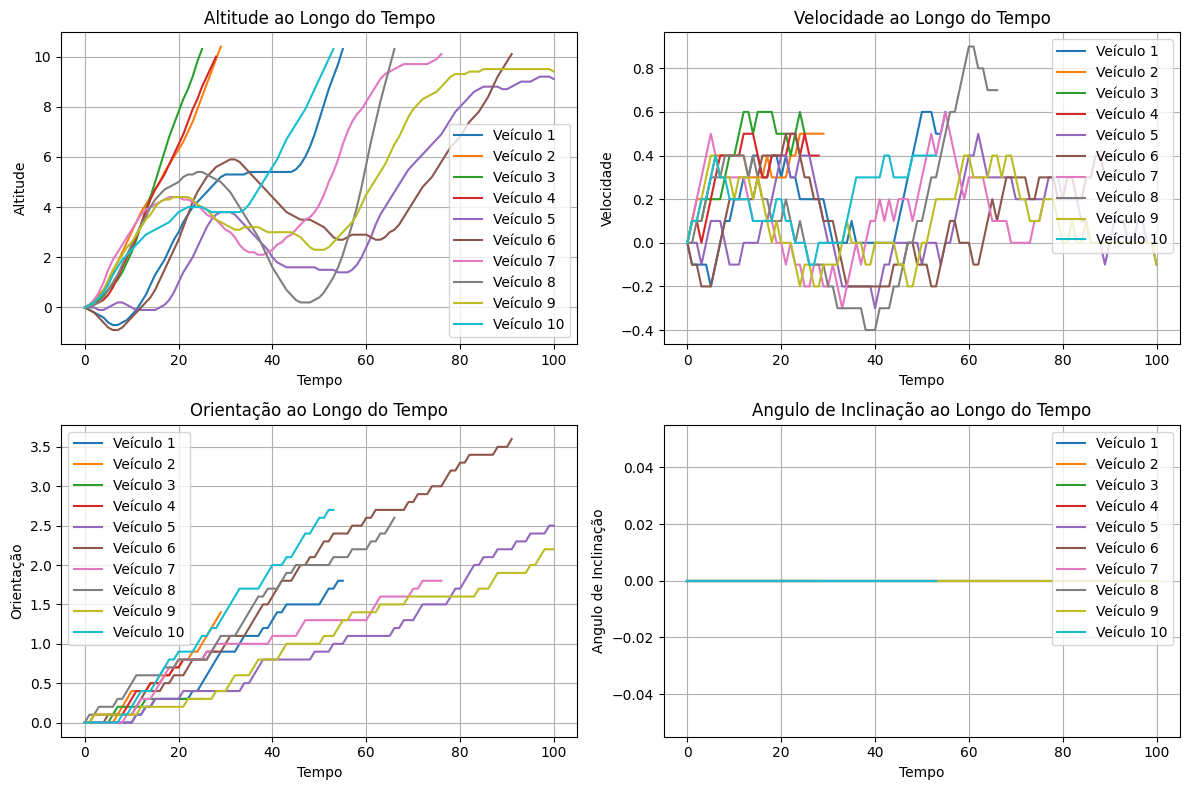

In [7]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO

# Definir um ambiente de simulação para o veículo aéreo
class AerialVehicleEnv(gym.Env):
    def __init__(self):
        super(AerialVehicleEnv, self).__init__()
        self.action_space = gym.spaces.Discrete(4)  # Ações: acelerar, manter velocidade, desacelerar, girar
        self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(4,))  # Estado: altitude, velocidade, orientação, angulo de inclinação
        self.altitude = 0
        self.velocity = 0
        self.orientation = 0
        self.inclination_angle = 0

    def step(self, action):
        # Simular o veículo aéreo
        if action == 0:
            self.velocity += 0.1
        elif action == 1:
            pass  # Manter a velocidade constante
        elif action == 2:
            self.velocity -= 0.1
        elif action == 3:
            self.orientation += 0.1

        # Atualizar altitude com base na velocidade
        self.altitude += self.velocity

        # Definir recompensa com base na altitude
        reward = self.altitude

        # Verificar se o episódio terminou
        done = abs(self.altitude) > 10

        return [self.altitude, self.velocity, self.orientation, self.inclination_angle], reward, done, {}

    def reset(self):
        # Resetar o ambiente
        self.altitude = 0
        self.velocity = 0
        self.orientation = 0
        self.inclination_angle = 0
        return [self.altitude, self.velocity, self.orientation, self.inclination_angle]

# Criar e treinar um agente de aprendizado por reforço (PPO)
num_vehicles = 10
envs = [AerialVehicleEnv() for _ in range(num_vehicles)]
models = [PPO("MlpPolicy", env, verbose=0) for env in envs]
for model in models:
    model.learn(total_timesteps=10000)

# Testar os agentes treinados
all_altitudes = []
all_velocities = []
all_orientations = []
all_inclination_angles = []
for env, model in zip(envs, models):
    obs = env.reset()
    altitudes = [obs[0]]
    velocities = [obs[1]]
    orientations = [obs[2]]
    inclination_angles = [obs[3]]
    for _ in range(100):
        action, _ = model.predict(obs)
        obs, reward, done, _ = env.step(action)
        altitudes.append(obs[0])
        velocities.append(obs[1])
        orientations.append(obs[2])
        inclination_angles.append(obs[3])
        if done:
            break
    all_altitudes.append(altitudes)
    all_velocities.append(velocities)
    all_orientations.append(orientations)
    all_inclination_angles.append(inclination_angles)

# Plotar os gráficos para os 10 veículos
plt.figure(figsize=(12, 8))
for i in range(num_vehicles):
    plt.subplot(2, 2, 1)
    plt.plot(all_altitudes[i], label=f'Veículo {i+1}')
    plt.xlabel('Tempo')
    plt.ylabel('Altitude')
    plt.title('Altitude ao Longo do Tempo')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(all_velocities[i], label=f'Veículo {i+1}')
    plt.xlabel('Tempo')
    plt.ylabel('Velocidade')
    plt.title('Velocidade ao Longo do Tempo')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(all_orientations[i], label=f'Veículo {i+1}')
    plt.xlabel('Tempo')
    plt.ylabel('Orientação')
    plt.title('Orientação ao Longo do Tempo')
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(all_inclination_angles[i], label=f'Veículo {i+1}')
    plt.xlabel('Tempo')
    plt.ylabel('Angulo de Inclinação')
    plt.title('Angulo de Inclinação ao Longo do Tempo')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
